In [7]:
import matplotlib.pyplot as plt

from src.matrices import A_1, A_2, A_3
from src.methods import baseline, leverrier, krylov, hyman, summation
from src.helpers import plot_coefficient_errors, compute_coefficient_errors

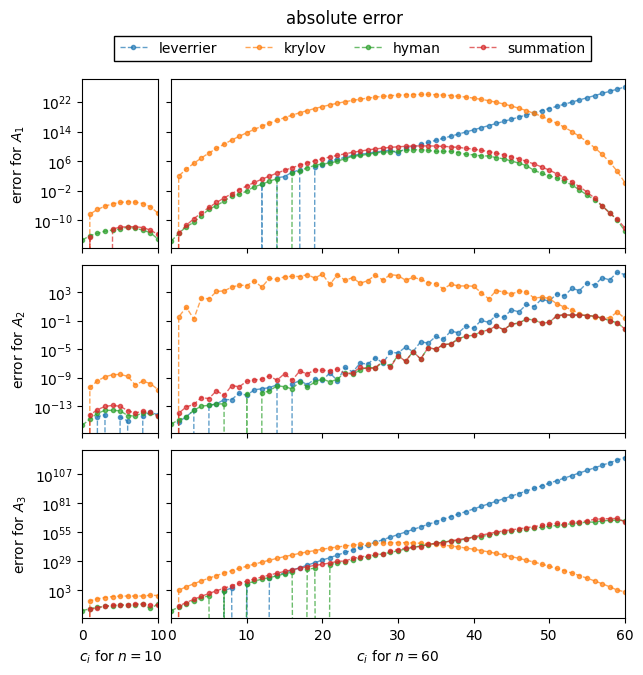

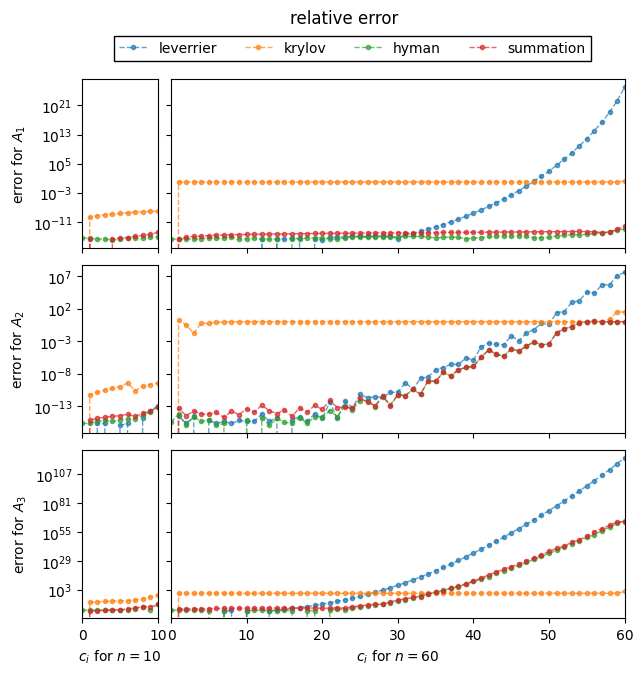

In [8]:
# Define what should be plotted
modes = ["absolute", "relative"]
ns = [10, 60]
matrices = ["A_1", "A_2", "A_3"]
methods = ["leverrier", "krylov", "hyman", "summation"]

# Define the plot-settings
plot_settings = {"sharex": "col", "sharey":"row", "gridspec_kw": {"width_ratios": [n / min(ns) for n in ns]}, "figsize": (7, 7)}
line_settings = {"linestyle": "--", "linewidth": 1, "marker": "o", "markersize": 3, "alpha": 0.7, "label": None}
legend_settings = {"ncol": len(methods), "loc": "upper center", "bbox_to_anchor": (0.4, 1.3), "fancybox": False, "framealpha": 1, "edgecolor": "k"}

# Instantiate the plots
figs, axs = [], []
for fig, ax in [plt.subplots(len(matrices), len(ns), **plot_settings) for i in range(len(modes))]:
    figs.append(fig), axs.append(ax)
 
# Plot the errors for the coefficients
for i, matrix in enumerate(matrices):
    for j, n in enumerate(ns):
        A = eval(matrix)(n)
        coeffs_baseline = baseline(A)
        for method in methods:
            coeffs = eval(method)(A)
            line_settings["label"] = "{}".format(method)
            for k, mode in enumerate(modes):
                plot_coefficient_errors(coeffs, coeffs_baseline, mode=mode, ax=axs[k][i, j], **line_settings)

# Format and label the plots
for k, mode in enumerate(modes):
    for i, matrix in enumerate(matrices):
        axs[k][i, 0].set_ylabel("error for ${}$".format(matrix))
        for j, n in enumerate(ns):
            axs[k][i, j].set_xlim(0, n)
            axs[k][-1, j].set_xlabel("$c_i$ for $n={}$".format(n))
    figs[k].suptitle(mode + " error")
    figs[k].subplots_adjust(wspace=0.05, hspace=0.1)
    axs[k][0, -1].legend(**legend_settings)
